# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
# NN models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/milkquality/milknew.csv


# Loading the dataset

In [2]:
df=pd.read_csv('/kaggle/input/milkquality/milknew.csv')
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


# Exploratory Data Analysis

In [3]:
df.shape

(1059, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [5]:
df.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [6]:
df.duplicated().sum()

976

In [7]:
df.nunique()

pH            16
Temprature    17
Taste          2
Odor           2
Fat            2
Turbidity      2
Colour         9
Grade          3
dtype: int64

In [8]:
df['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

In [9]:
#df['Grade'] =df['Grade'].map({'low': 0, 'medium': 1,'high':2})

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pH,1059.0,6.630123,1.399679,3.0,6.5,6.7,6.8,9.5
Temprature,1059.0,44.226629,10.098364,34.0,38.0,41.0,45.0,90.0
Taste,1059.0,0.546742,0.498046,0.0,0.0,1.0,1.0,1.0
Odor,1059.0,0.432483,0.495655,0.0,0.0,0.0,1.0,1.0
Fat,1059.0,0.671388,0.469930,0.0,0.0,1.0,1.0,1.0
Turbidity,1059.0,0.491029,0.500156,0.0,0.0,0.0,1.0,1.0
Colour,1059.0,251.840415,4.307424,240.0,250.0,255.0,255.0,255.0


# Data Visualization

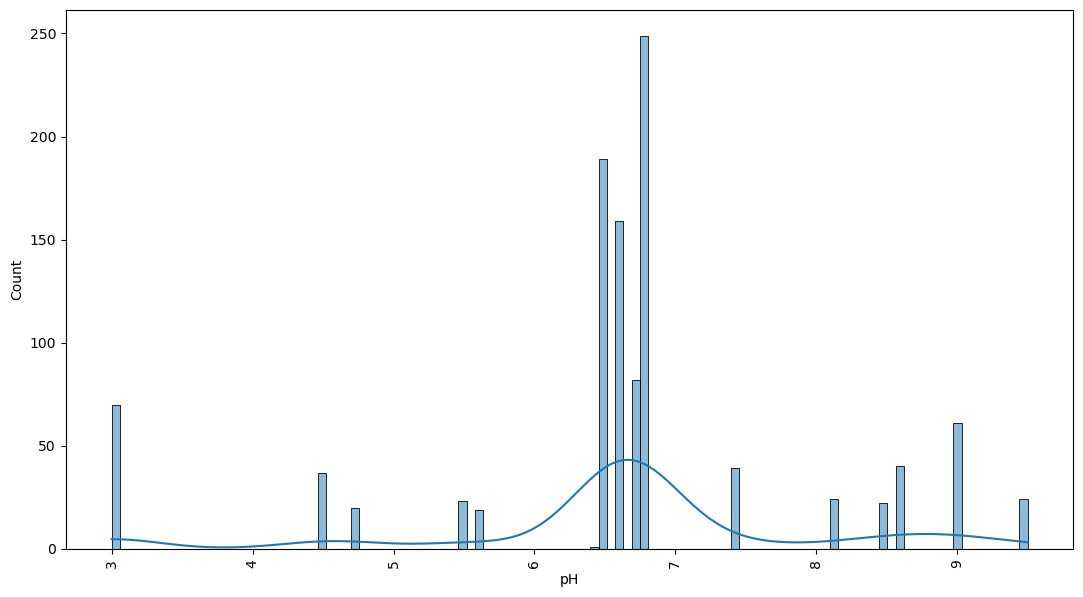

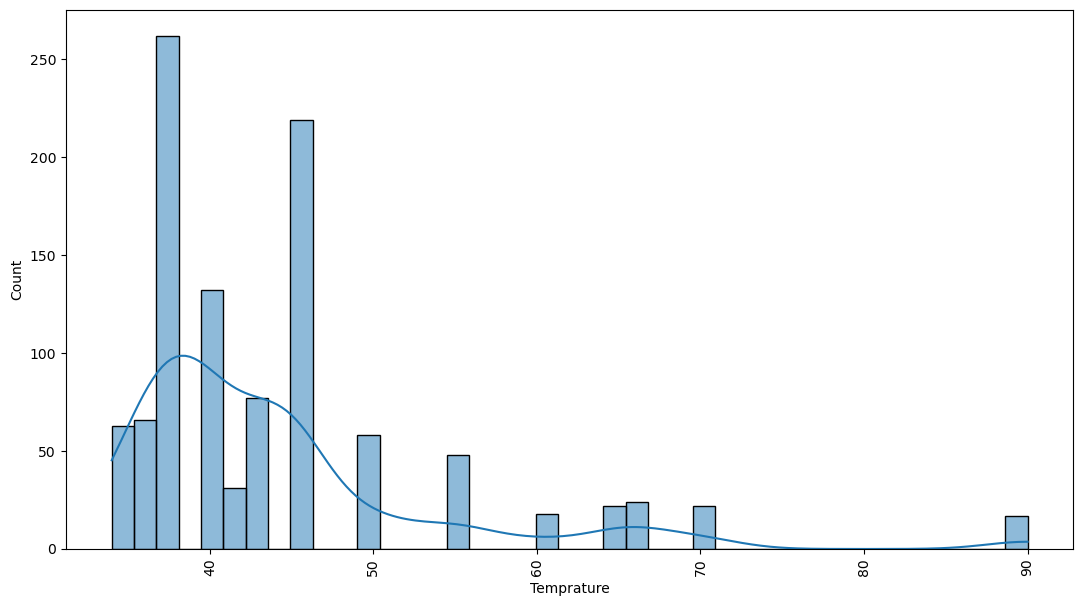

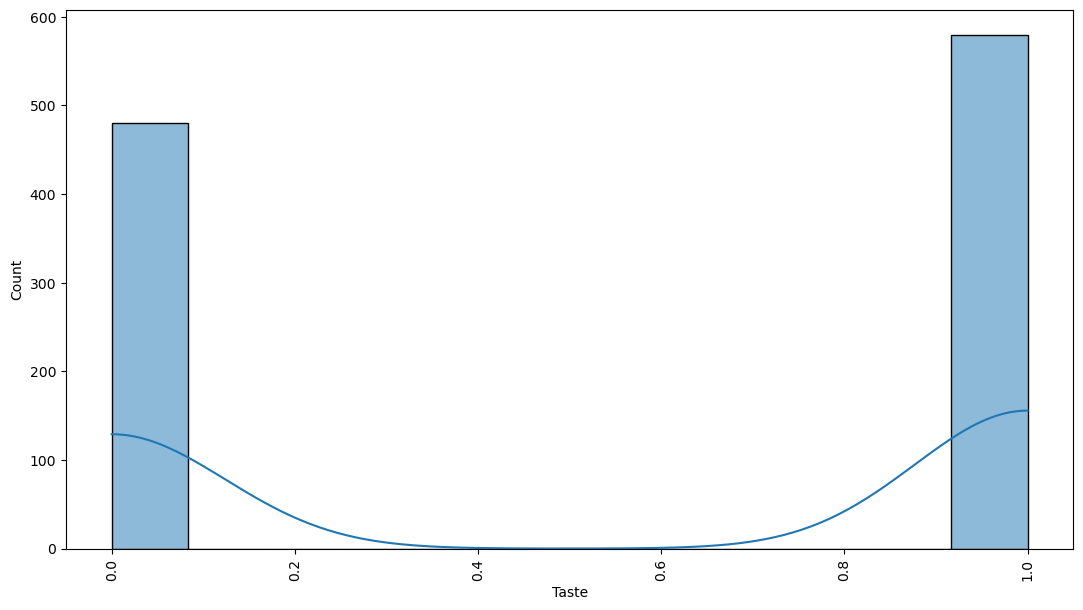

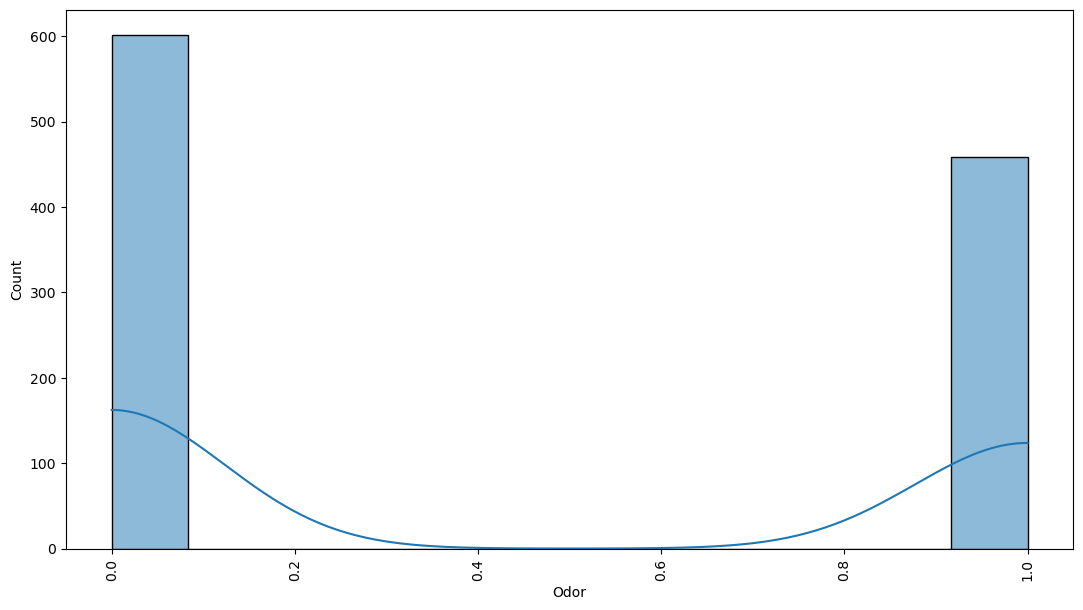

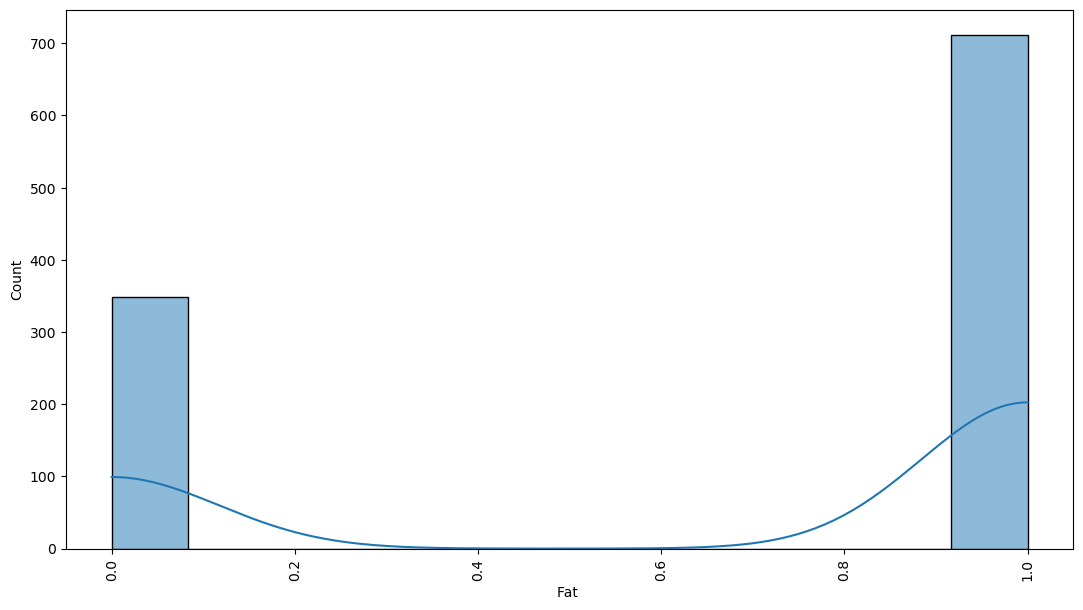

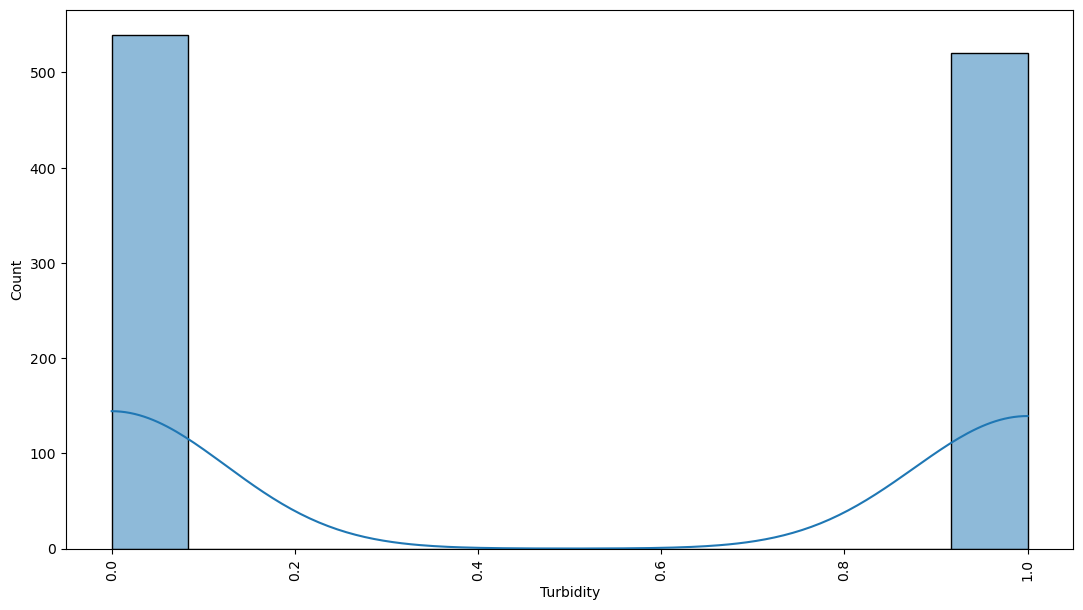

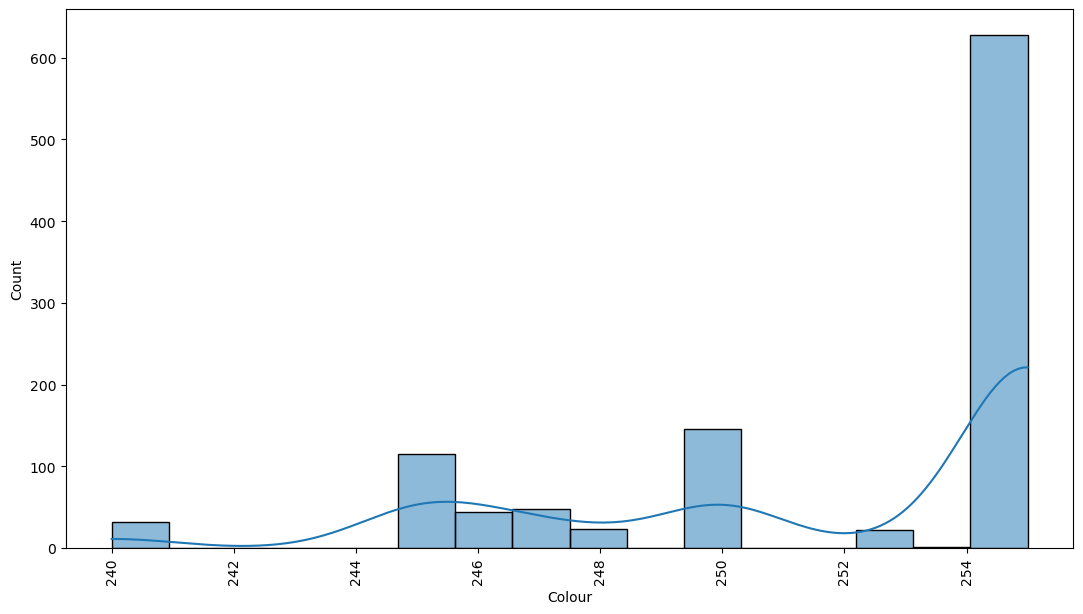

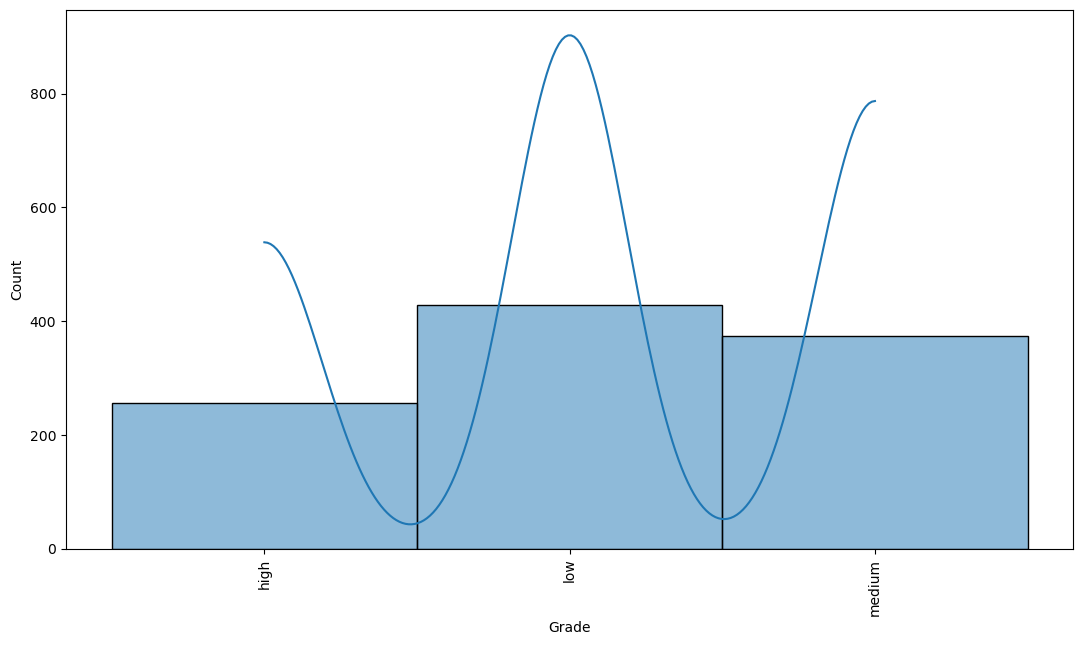

In [11]:
for i in df.columns:
    plt.figure(figsize=(13,7))
    sns.histplot(data = df[i], kde=True, multiple='stack')
    plt.xticks(rotation=90)
    plt.show()

array([[<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'Temprature'}>,
        <AxesSubplot:title={'center':'Taste'}>],
       [<AxesSubplot:title={'center':'Odor'}>,
        <AxesSubplot:title={'center':'Fat '}>,
        <AxesSubplot:title={'center':'Turbidity'}>],
       [<AxesSubplot:title={'center':'Colour'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

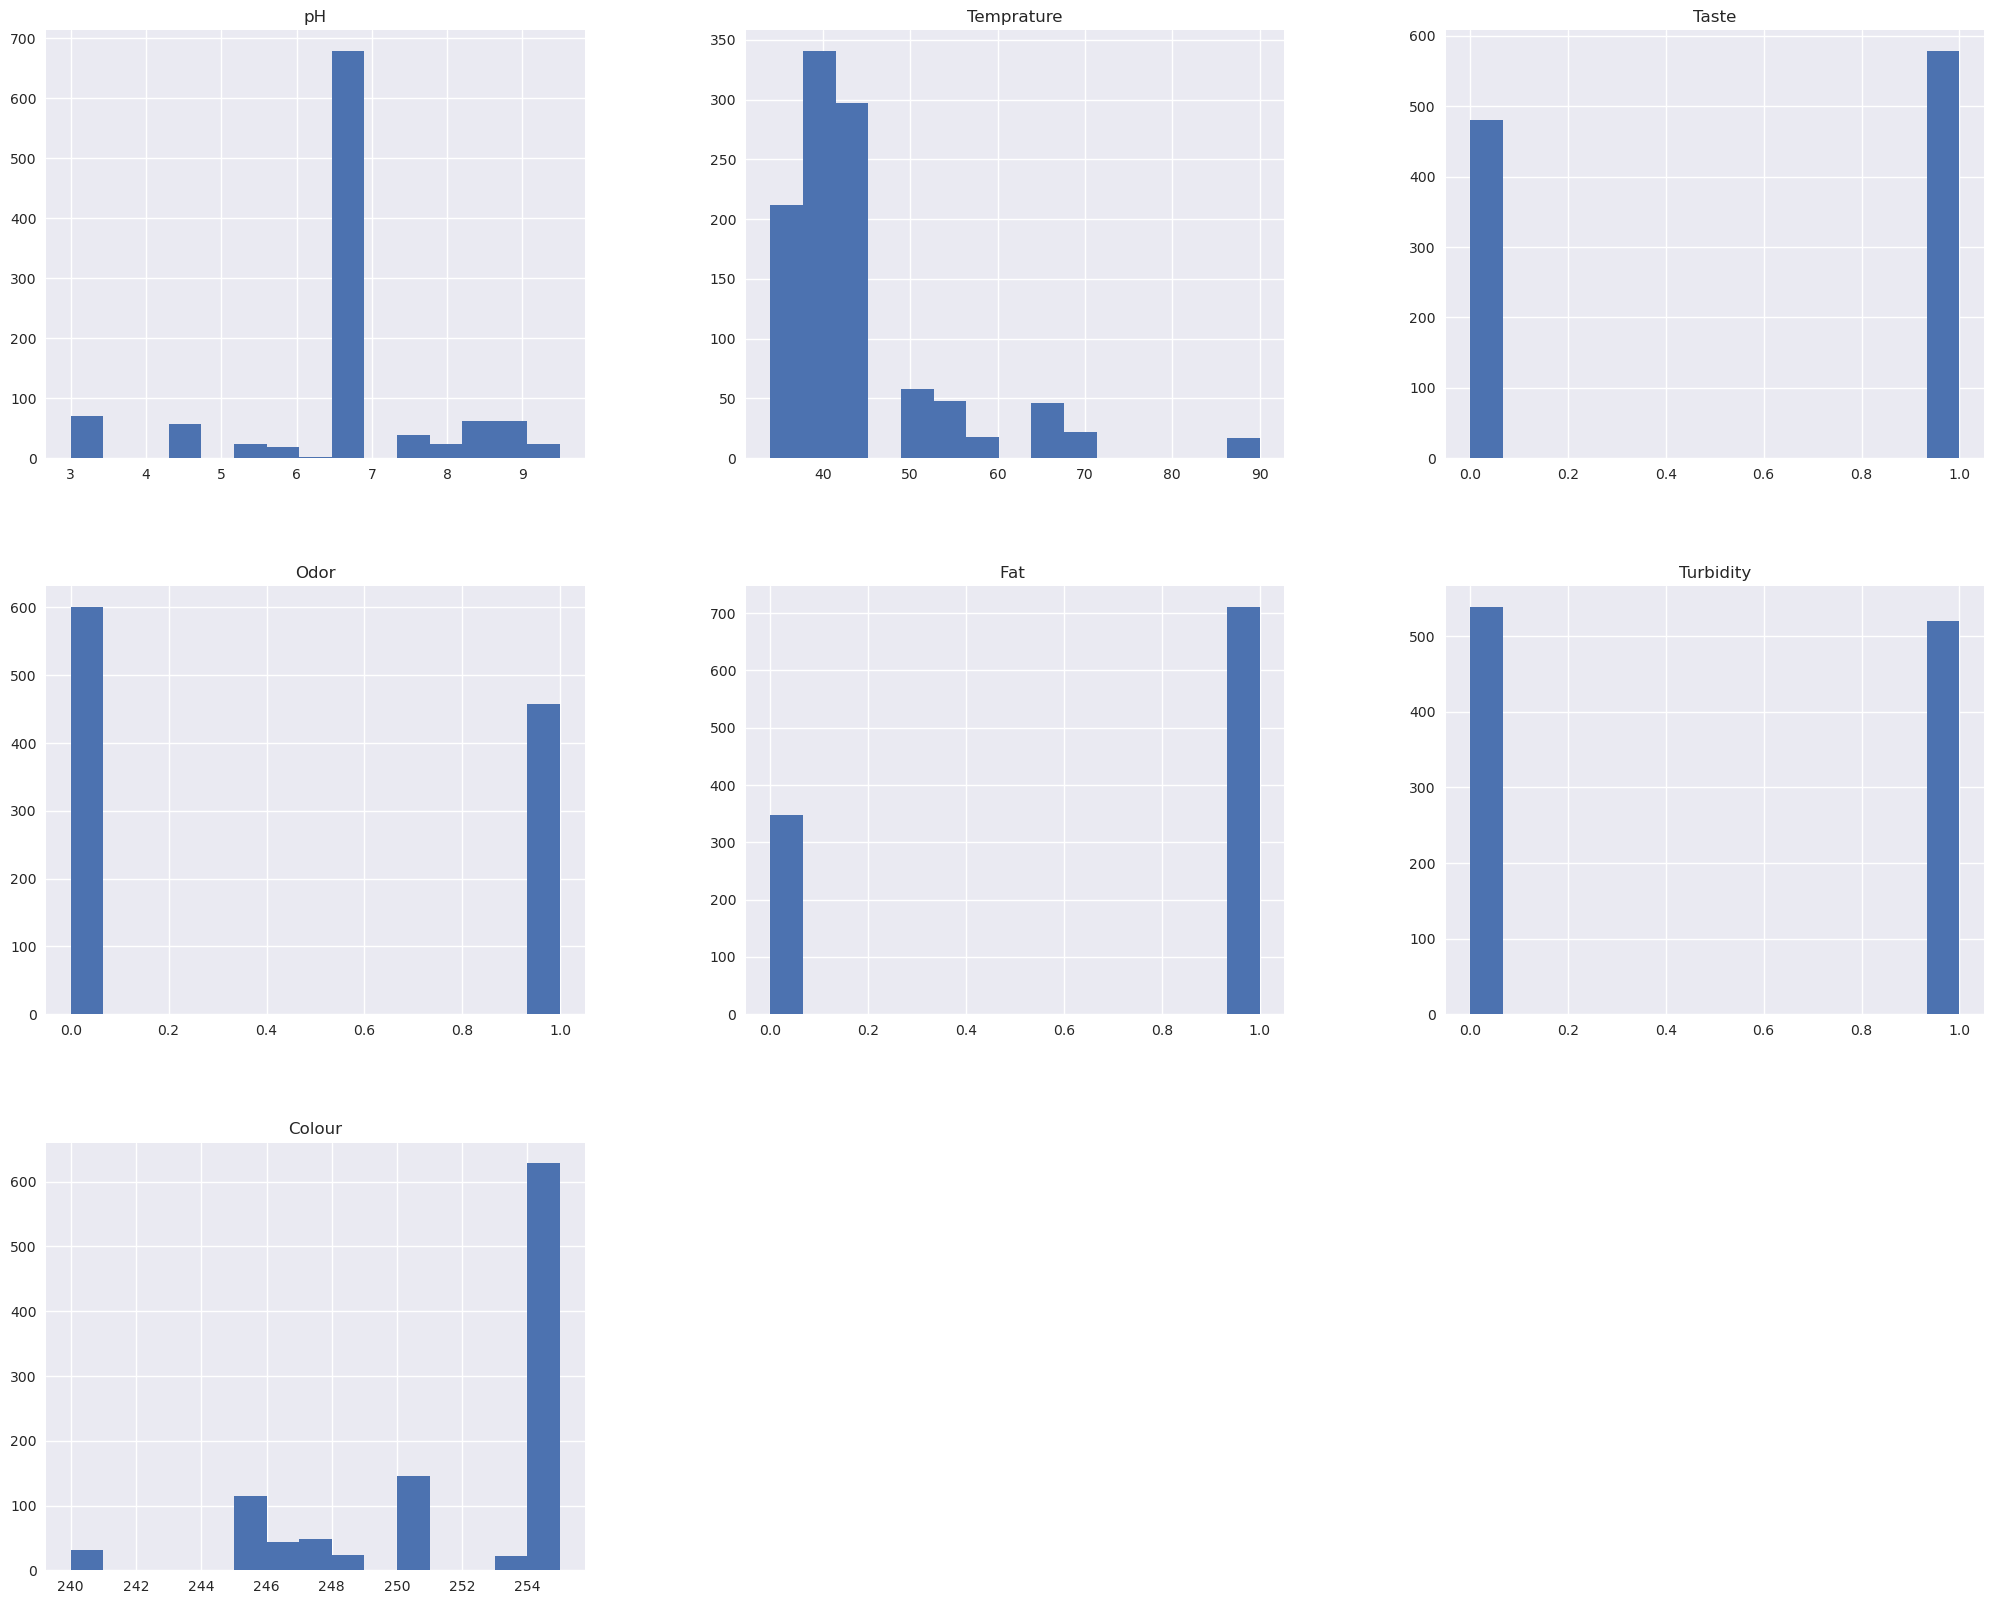

In [12]:
plt.style.use("seaborn")
df.hist(figsize=(25,20), bins=15)

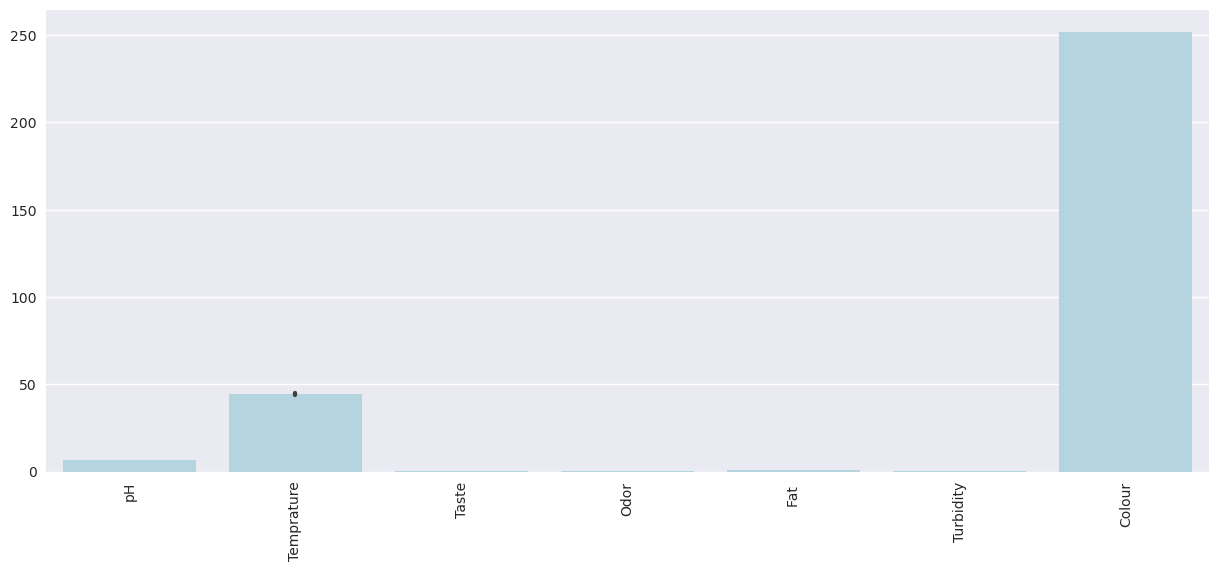

In [13]:
plt.figure(figsize=(15,6))
sns.barplot(data = df, color = 'lightblue')
plt.xticks(rotation=90, fontsize=10)
plt.show()

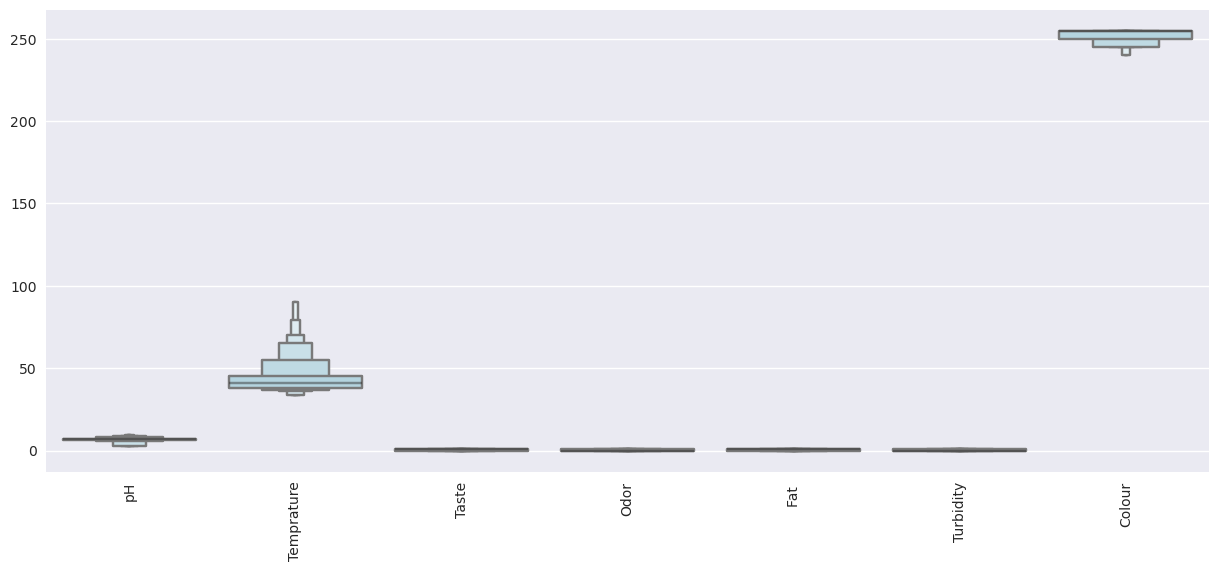

In [14]:
plt.figure(figsize=(15,6))
sns.boxenplot(data = df, color = 'lightblue')
plt.xticks(rotation=90, fontsize=10)
plt.show()

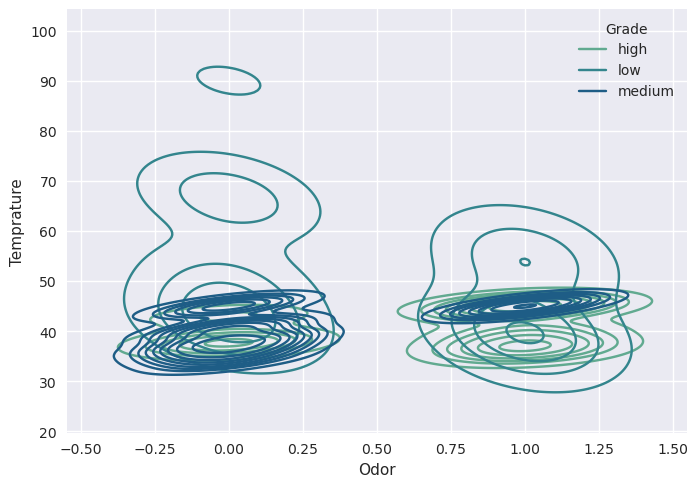

In [15]:
sns.kdeplot(x=df["Odor"], y=df["Temprature"], hue =df["Grade"], palette="crest");
plt.show()

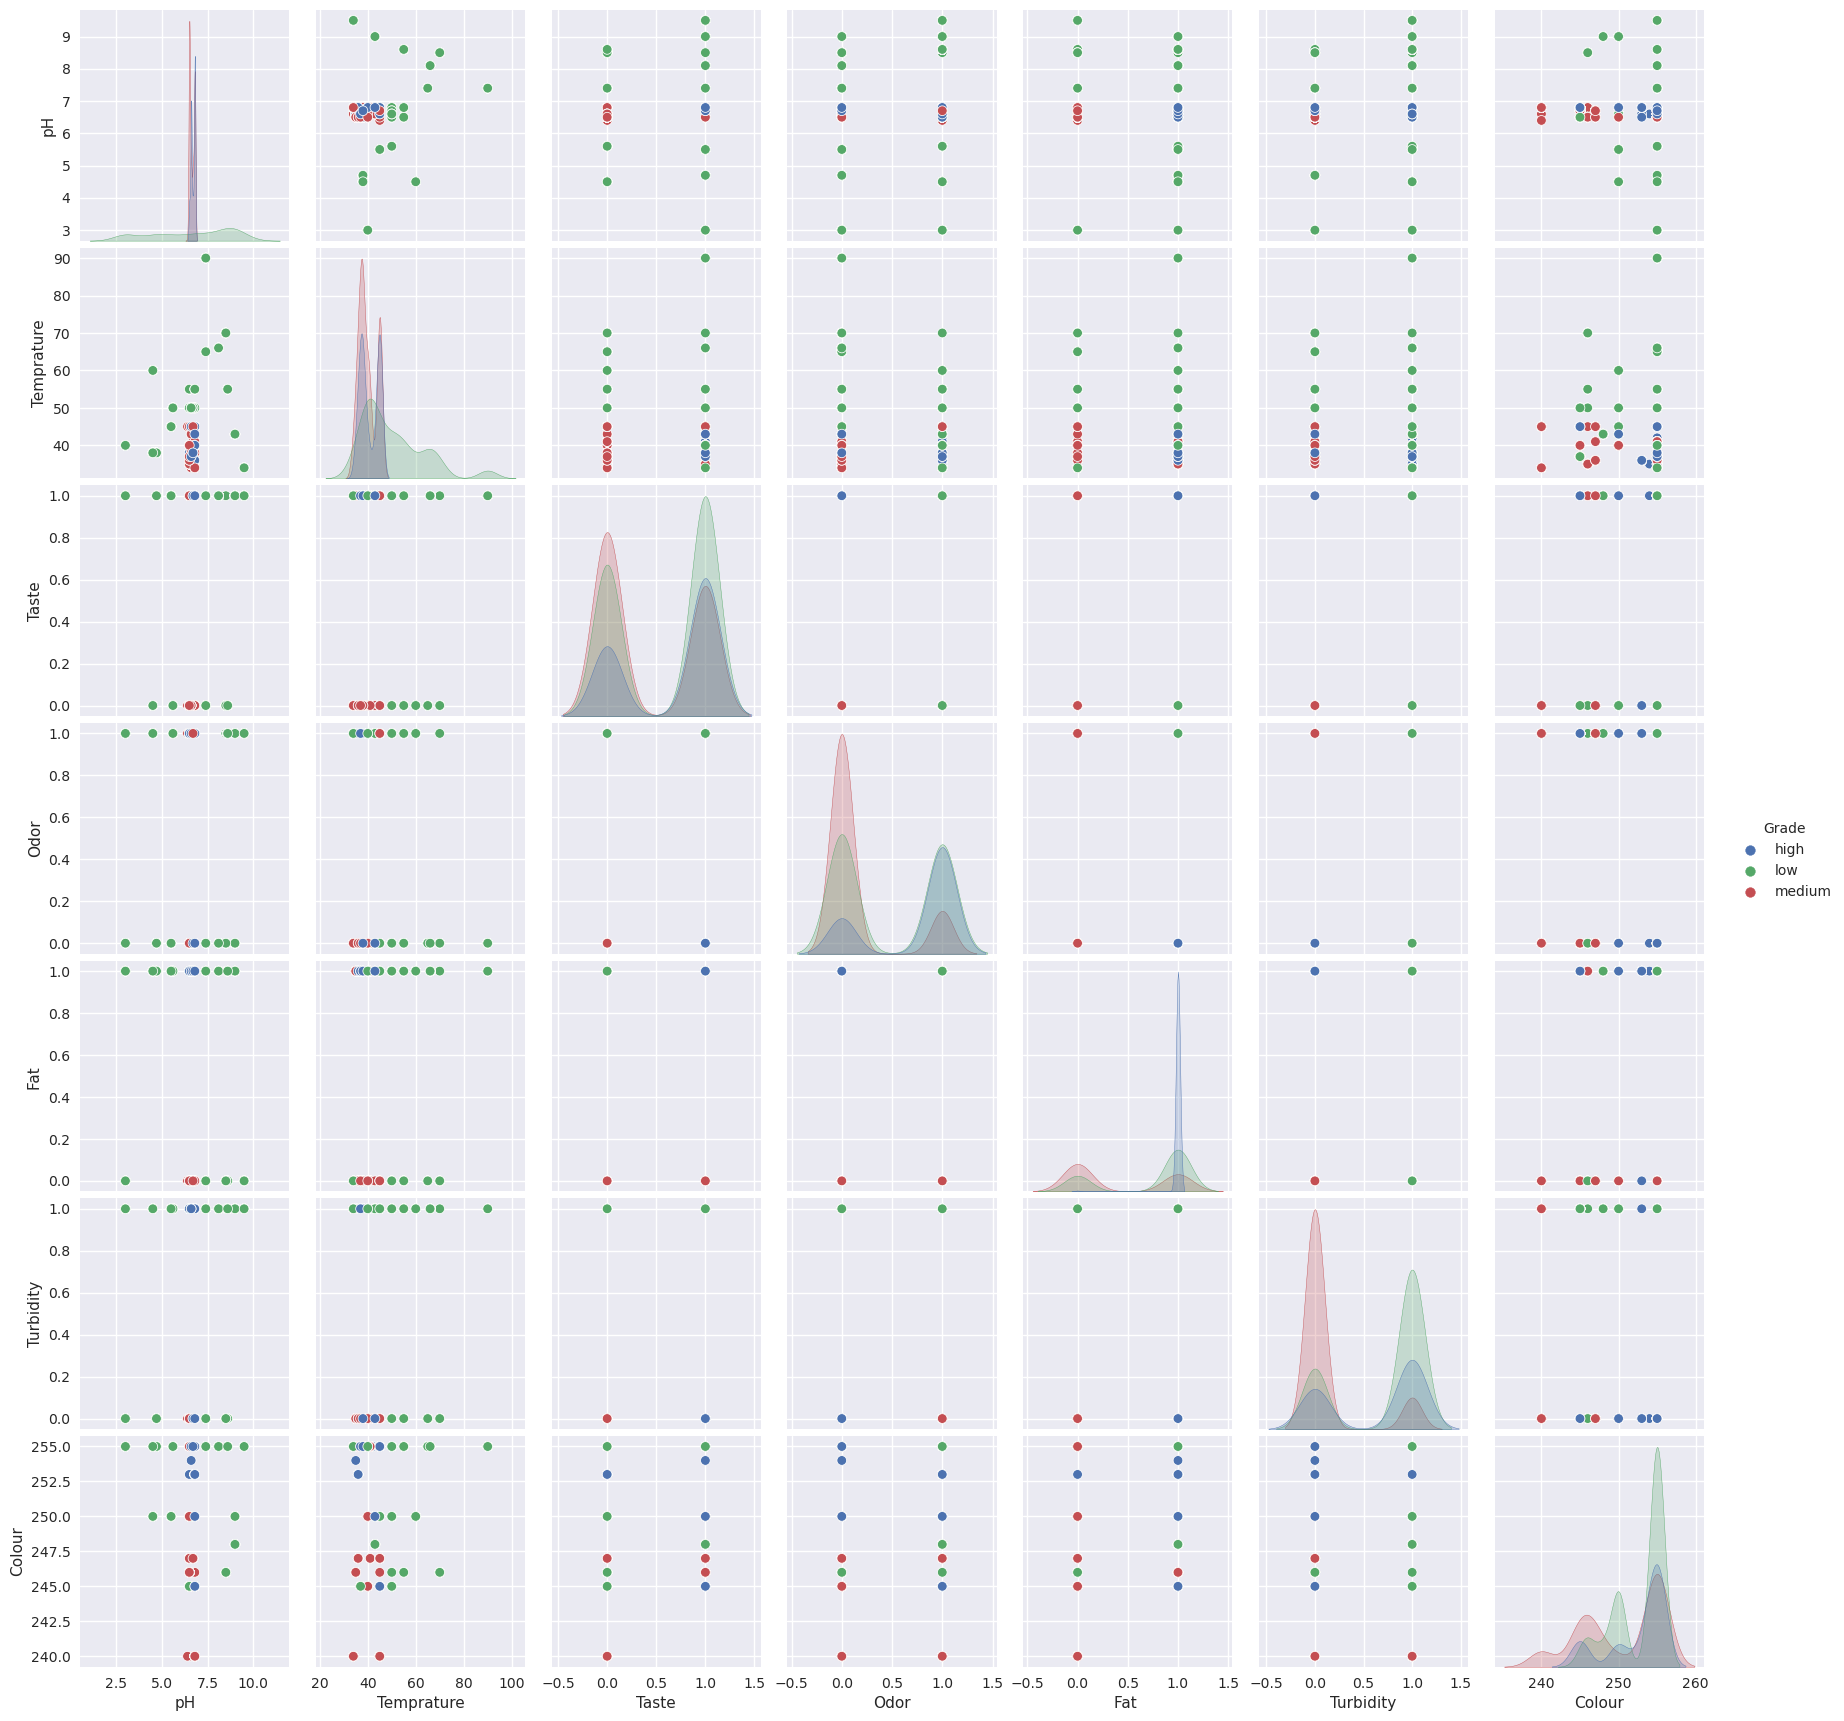

In [16]:
sns.pairplot(df,hue='Grade')

Text(0.5, 1.0, 'Correlation Heatmap')

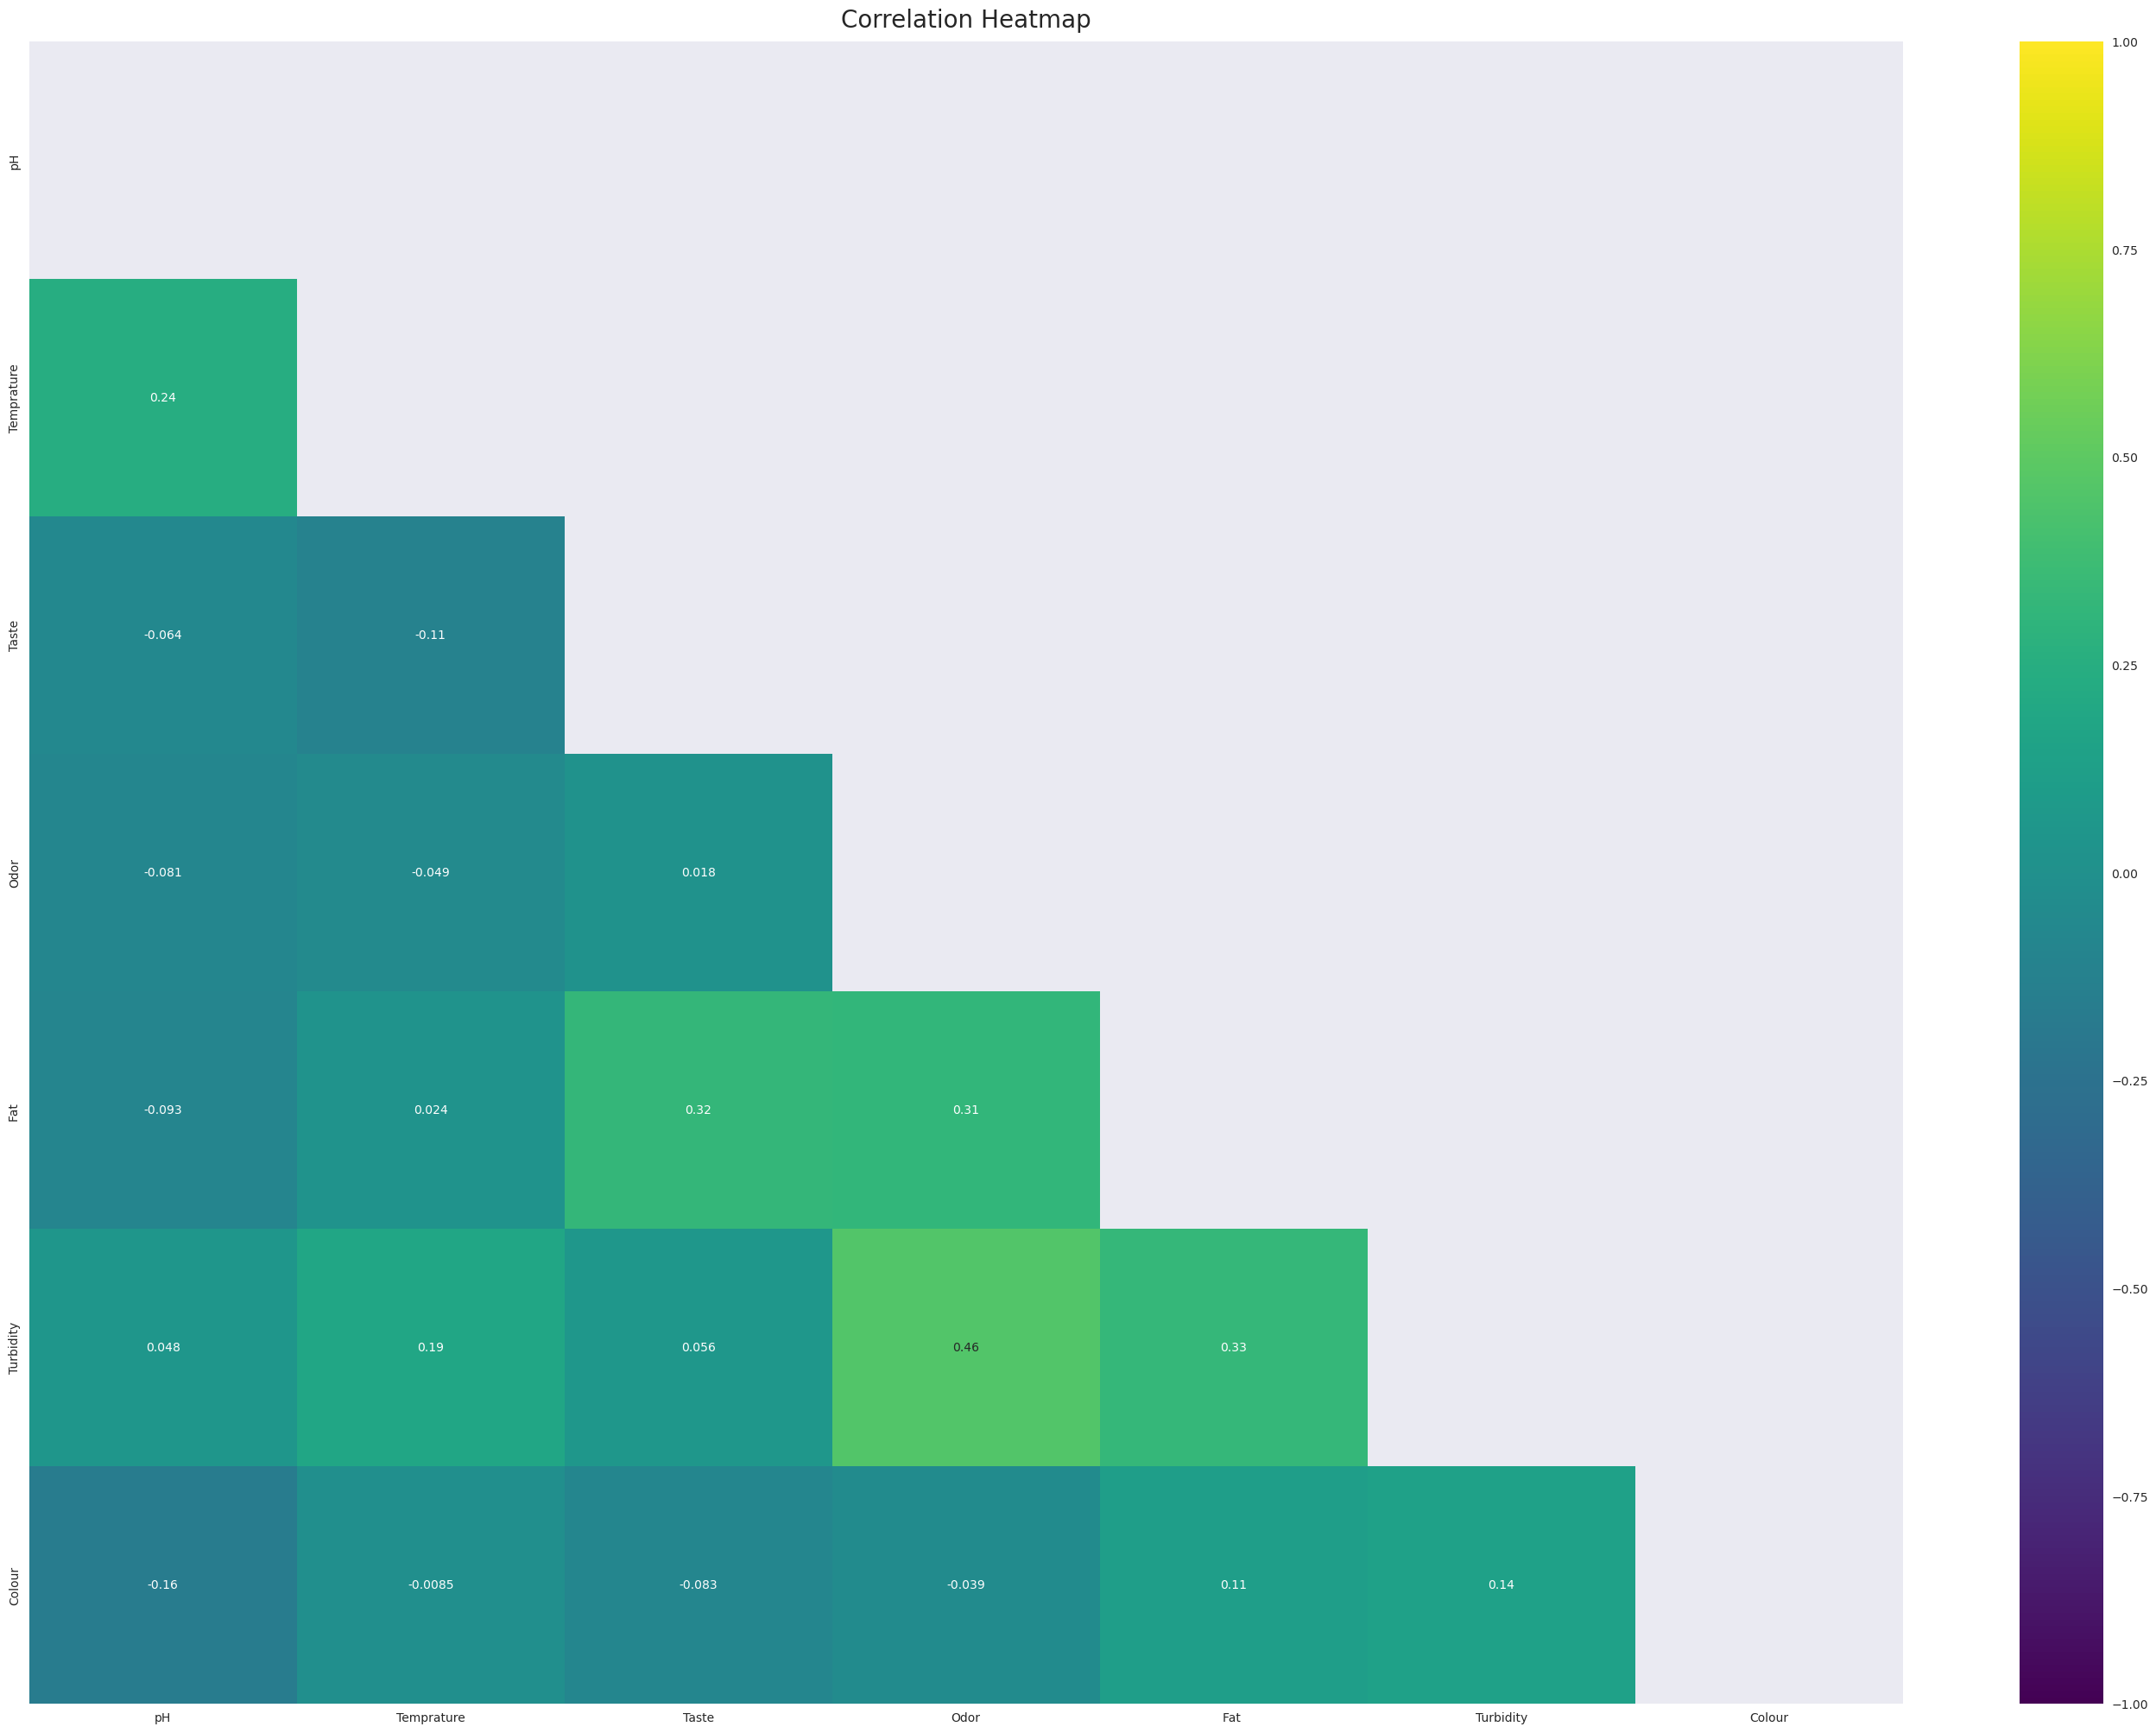

In [17]:
plt.figure(figsize=(35, 25))
corr = df.corr()
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(corr, mask = mask, vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12)


In [18]:
df['Grade'] =df['Grade'].map({'low': 0, 'medium': 1,'high':2})

# Data Preparation

In [19]:
x=df.drop('Grade',axis=1)
y=df['Grade']

# Model Building

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 0)

In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train_std = ss.fit_transform(x_train)
x_test_std = ss.transform(x_test)

# SVM

In [22]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [23]:
print("Training Accuracy :",svc.score(x_train,y_train))
print("Testing Accuracy :",svc.score(x_test,y_test))

Training Accuracy : 0.5479082321187584
Testing Accuracy : 0.5345911949685535


Text(0.5, 1.03, 'Confusion Matrix for SVM')

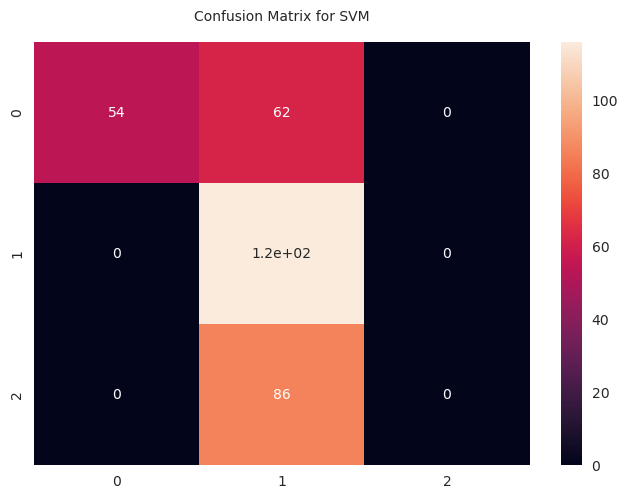

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_svc = svc.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM", fontsize=10, y=1.03)

In [25]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64       116
           1       0.44      1.00      0.61       116
           2       0.00      0.00      0.00        86

    accuracy                           0.53       318
   macro avg       0.48      0.49      0.42       318
weighted avg       0.53      0.53      0.45       318



# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',random_state=42)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [27]:
print("Training Accuracy :",dtc.score(x_train,y_train))
print("Testing Accuracy :",dtc.score(x_test,y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9874213836477987


Text(0.5, 1.03, 'Confusion Matrix for DecisionTreeClassifier')

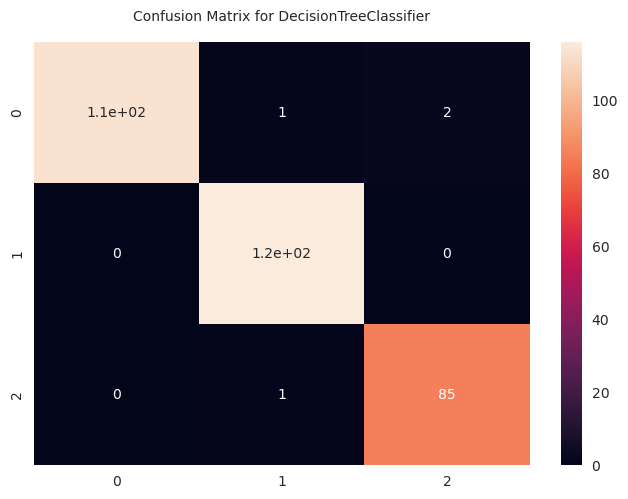

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_dtc = dtc.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for DecisionTreeClassifier", fontsize=10, y=1.03)

In [29]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       116
           1       0.98      1.00      0.99       116
           2       0.98      0.99      0.98        86

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
print("Training Accuracy :",rfc.score(x_train,y_train))
print("Testing Accuracy :",rfc.score(x_test,y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9874213836477987


Text(0.5, 1.03, 'Confusion Matrix for RandomForestClassifier')

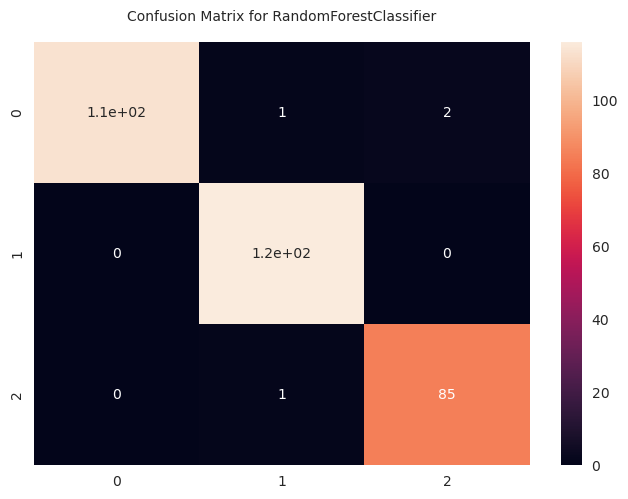

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_rfc = rfc.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for RandomForestClassifier", fontsize=10, y=1.03)

In [33]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       116
           1       0.98      1.00      0.99       116
           2       0.98      0.99      0.98        86

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



# Gaussian Naive Bias

In [34]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [35]:
print("Training Accuracy :",nb.score(x_train,y_train))
print("Testing Accuracy :",nb.score(x_test,y_test))

Training Accuracy : 0.8421052631578947
Testing Accuracy : 0.8081761006289309


Text(0.5, 1.03, 'Confusion Matrix for GaussianNB')

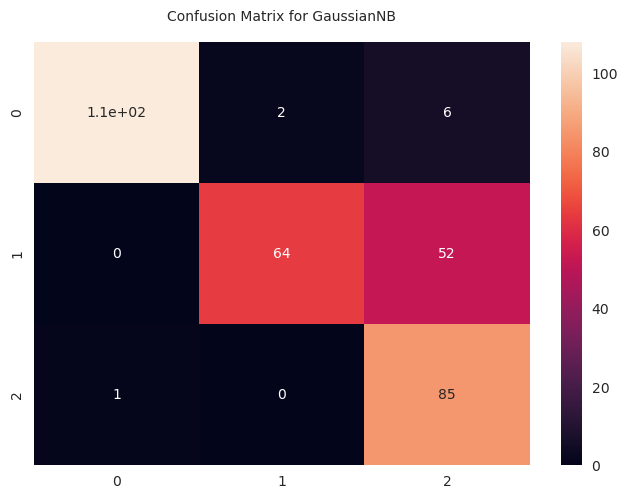

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_nb = nb.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for GaussianNB", fontsize=10, y=1.03)

In [37]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       116
           1       0.97      0.55      0.70       116
           2       0.59      0.99      0.74        86

    accuracy                           0.81       318
   macro avg       0.85      0.82      0.80       318
weighted avg       0.88      0.81      0.81       318



# Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
lnr = LinearRegression()
lnr.fit(x_train, y_train)

LinearRegression()

In [39]:
print("Training Accuracy :",lnr.score(x_train,y_train))
print("Testing Accuracy :",lnr.score(x_test,y_test))

Training Accuracy : 0.2797660354192826
Testing Accuracy : 0.2543546562708897


# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [41]:
print("Training Accuracy :",lr.score(x_train,y_train))
print("Testing Accuracy :",lr.score(x_test,y_test))

Training Accuracy : 0.7462887989203779
Testing Accuracy : 0.7327044025157232


Text(0.5, 1.03, 'Confusion Matrix for Logistic Regression')

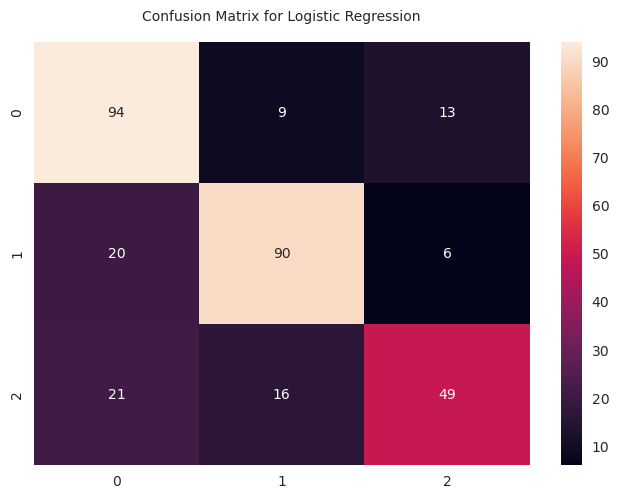

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_lr = lr.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Logistic Regression", fontsize=10, y=1.03)

In [43]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       116
           1       0.78      0.78      0.78       116
           2       0.72      0.57      0.64        86

    accuracy                           0.73       318
   macro avg       0.73      0.72      0.72       318
weighted avg       0.73      0.73      0.73       318



# XgBoost

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [45]:
print("Training Accuracy :",xgb.score(x_train,y_train))
print("Testing Accuracy :",xgb.score(x_test,y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9874213836477987


Text(0.5, 1.03, 'Confusion Matrix for XGBClassifierClassifier')

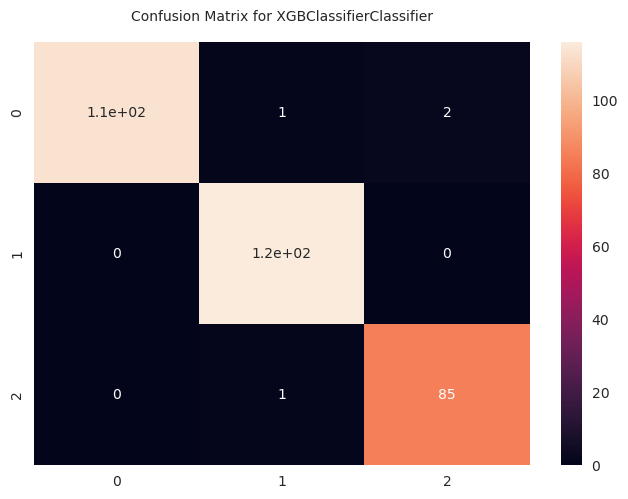

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_xgb = xgb.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for XGBClassifierClassifier", fontsize=10, y=1.03)

In [47]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       116
           1       0.98      1.00      0.99       116
           2       0.98      0.99      0.98        86

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



# KNeighbors

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [49]:
print("Training Accuracy :",knn.score(x_train,y_train))
print("Testing Accuracy :",knn.score(x_test,y_test))

Training Accuracy : 0.9919028340080972
Testing Accuracy : 0.9874213836477987


Text(0.5, 1.03, 'Confusion Matrix for KNeighborsClassifier')

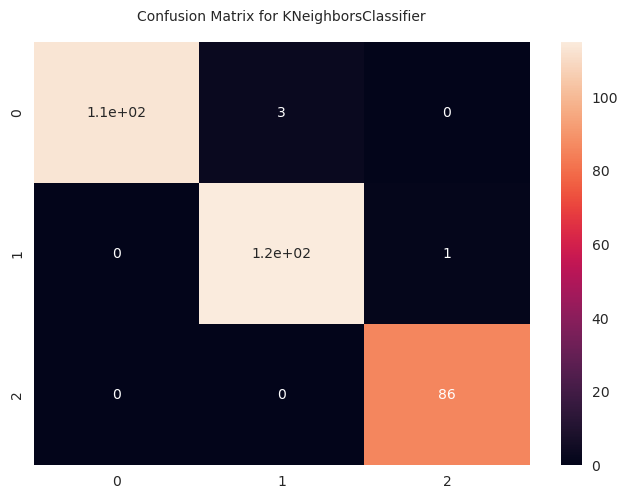

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_knn = knn.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for KNeighborsClassifier", fontsize=10, y=1.03)

In [51]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       116
           1       0.97      0.99      0.98       116
           2       0.99      1.00      0.99        86

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



# GradientBoosting

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [53]:
print("Training Accuracy :",gb.score(x_train,y_train))
print("Testing Accuracy :",gb.score(x_test,y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9905660377358491


Text(0.5, 1.03, 'Confusion Matrix for GradientBoostingClassifier')

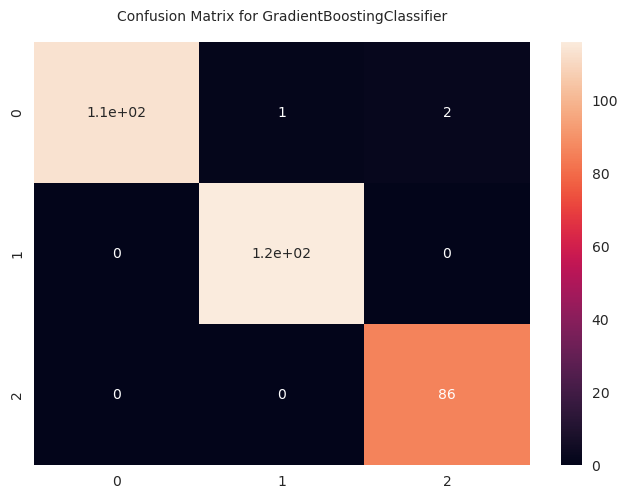

In [54]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_gb = gb.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for GradientBoostingClassifier", fontsize=10, y=1.03)

In [55]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       116
           1       0.99      1.00      1.00       116
           2       0.98      1.00      0.99        86

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



# Artificial neural network

In [56]:
# ANN Model Layers
from tensorflow.keras.layers import BatchNormalization
ann_model =Sequential()

ann_model.add(Dense(units = 32,activation = 'relu'))
ann_model.add(BatchNormalization())
ann_model.add(Dropout(0.5))

ann_model.add(Dense(units = 64,activation = 'relu'))
ann_model.add(BatchNormalization())
ann_model.add(Dropout(0.5))

ann_model.add(Dense(units = 1,activation = 'sigmoid'))
 
# Model Optimizer
ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [57]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [58]:
# Training the ANN
history = ann_model.fit(x_train, y_train, batch_size=16, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
47/47 [==============================] - 2s 8ms/step - loss: 0.9364 - accuracy: 0.4521 - val_loss: 6.3271 - val_accuracy: 0.3648
Epoch 2/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4443 - accuracy: 0.5412 - val_loss: 1.0002 - val_accuracy: 0.4528
Epoch 3/100
47/47 [==============================] - 0s 3ms/step - loss: 0.0975 - accuracy: 0.5776 - val_loss: 0.7874 - val_accuracy: 0.4686
Epoch 4/100
47/47 [==============================] - 0s 4ms/step - loss: 0.0673 - accuracy: 0.5344 - val_loss: -0.0601 - val_accuracy: 0.5252
Epoch 5/100
47/47 [==============================] - 0s 3ms/step - loss: -0.0162 - accuracy: 0.5574 - val_loss: 1.2288 - val_accuracy: 0.4088
Epoch 6/100
47/47 [==============================] - 0s 4ms/step - loss: -0.1415 - accuracy: 0.5762 - val_loss: 4.8013 - val_accuracy: 0.3648
Epoch 7/100
47/47 [==============================] - 0s 5ms/step - loss: -0.3351 - accuracy: 0.5803 - val_loss: 1.4062 - val_accuracy: 0.3742
Epoch 8/1

In [59]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

<AxesSubplot:>

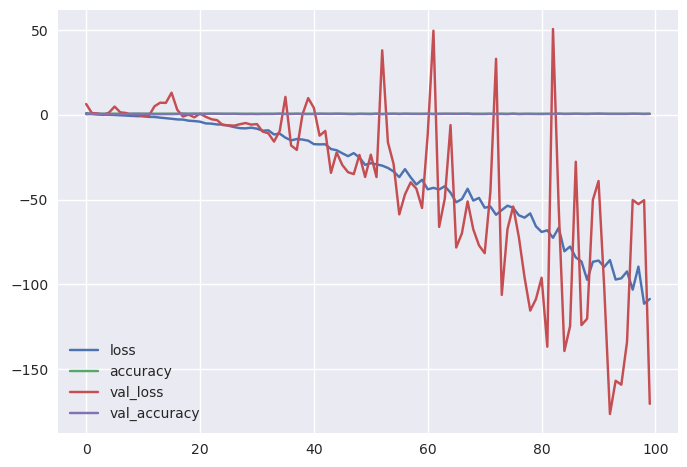

In [60]:
loss_plot = pd.DataFrame(ann_model.history.history)
loss_plot.plot()

In [61]:
#now testing for Test data
y_pred = ann_model.predict(x_test)
y_pred = (y_pred>0.5)
acc_test_ann1 = round(metrics.accuracy_score(y_test,y_pred) * 100, 2)
acc_test_ann1

10/10 [==============================] - 0s 1ms/step


53.77

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test,y_pred)
acc_test_ann1 = accuracy_score(y_test,y_pred)
print(cm)
print('score is:',acc_test_ann1)

[[ 65  51   0]
 [ 10 106   0]
 [  0  86   0]]
score is: 0.5377358490566038


In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.56      0.68       116
           1       0.44      0.91      0.59       116
           2       0.00      0.00      0.00        86

    accuracy                           0.54       318
   macro avg       0.43      0.49      0.42       318
weighted avg       0.48      0.54      0.46       318



# Prediction

In [64]:
print(xgb.predict(x_test))

[2 0 1 0 2 1 0 2 2 1 0 2 1 1 2 1 2 2 2 0 2 0 1 2 2 0 2 2 0 1 2 0 0 1 2 2 0
 1 2 0 2 1 2 0 1 0 2 0 1 0 2 1 1 1 0 1 1 0 1 0 1 0 1 2 0 1 0 1 1 2 2 1 1 2
 1 1 1 0 2 1 0 1 1 0 1 1 2 0 2 0 1 2 1 0 2 1 0 2 1 1 2 1 0 1 2 2 2 2 0 0 2
 2 2 2 0 1 0 2 1 2 1 1 0 2 2 0 0 0 1 2 0 1 0 1 2 1 1 1 1 0 1 2 0 0 1 2 0 0
 0 2 0 1 1 0 2 2 1 1 1 1 1 1 0 1 1 2 2 0 2 1 0 0 1 2 2 0 2 2 2 1 1 0 0 0 0
 2 1 2 0 0 2 0 0 0 1 0 1 1 2 1 0 2 1 0 1 1 0 1 1 0 2 1 1 1 1 1 2 1 2 0 2 2
 1 2 1 0 0 1 2 2 2 0 0 2 0 1 0 0 0 2 0 2 0 1 2 0 1 1 0 0 1 0 2 0 0 0 2 0 2
 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 2 1 0 0 1 1 0 2 2 0 1 2 1 1 1 0 1 0 0 0 0
 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 2 0 2 0]
